In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import models

import matplotlib.pyplot as plt

In [9]:

batch_size = 32
img_height = 224
img_width = 224

train_dataset = image_dataset_from_directory("Training", labels='inferred', image_size=(img_height, img_width), batch_size=batch_size)
test_dataset = image_dataset_from_directory("Testing",  labels='inferred',image_size=(img_height, img_width), batch_size=batch_size)

train_labels = train_dataset.class_names
test_labels = test_dataset.class_names

normalization_layer = layers.Rescaling(1./255)

normalized_train = train_dataset  #Switched to normalization layer in the model itself, but didn't want to change var names everywhere
normalized_test = test_dataset

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


tf.Tensor([0 1 0 3 1 1 1 1 3 1 2 3 0 0 2 3 0 2 2 1 2 1 2 1 0 0 2 0 0 2 0 1], shape=(32,), dtype=int32)


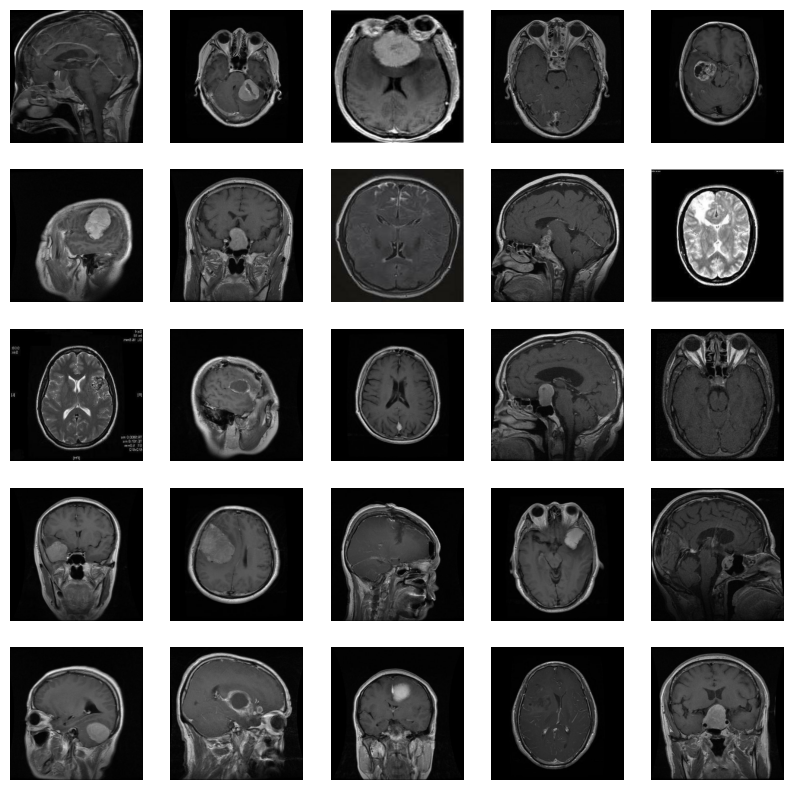

In [13]:
categories = [
    "glioma",
    "meningioma",
    "notumor",
    "pituitary"
]

rescale = layers.Rescaling(1./255)
rescaled_data = normalized_train.map(lambda x, y: (rescale(x), y))
print(labels)
plt.figure(figsize=(10, 10))
for images, labels in rescaled_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
plt.show()

In [16]:
model3 = models.Sequential([layers.Input(shape=(224, 224, 3))])
model3.add(layers.Rescaling(1./255))

model3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)))
#model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.GlobalAveragePooling2D())

model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.3))

#model3.add(layers.Dense(128, activation='relu'))
#model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(4, activation='softmax'))


In [17]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model3.fit(normalized_train, epochs=17)

test_loss, test_accuracy = model3.evaluate(normalized_test, verbose=2)

Epoch 1/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 313ms/step - accuracy: 0.4082 - loss: 1.1905
Epoch 2/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 315ms/step - accuracy: 0.6916 - loss: 0.7970
Epoch 3/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 315ms/step - accuracy: 0.7336 - loss: 0.6808
Epoch 4/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 317ms/step - accuracy: 0.7871 - loss: 0.5505
Epoch 5/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 302ms/step - accuracy: 0.8004 - loss: 0.5172
Epoch 6/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.8099 - loss: 0.4905
Epoch 7/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.8386 - loss: 0.4307
Epoch 8/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.8313 - loss: 0.4284
Epoch 9/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.8547 - loss: 0.3815
Epoch 10/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.8622 - loss: 0.3611
Epoch 11/17
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 298ms/step - accuracy: 0.8751 - loss: 0.3315
Epoch 12/17
179/179

In [ ]:
test_loss, test_accuracy = model2.evaluate(normalized_test, verbose=2)

In [ ]:
import tensorflow.keras.layers 
from tensorflow.keras.regularizers import l2

#Network Architecture

model = models.Sequential([layers.Input(shape=(224, 224, 3))])
model.add(layers.RandomFlip('horizontal'))
model.add(layers.RandomRotation(0.2))
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4,activation='softmax'))

In [ ]:
#Train and evaluate a new model1
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(normalized_train, epochs=25)

test_loss, test_accuracy = model.evaluate(normalized_test, verbose=2)

In [ ]:
model3.save(r'C:\Users\natha\projects\TensorFlow\Neuro86.keras')

In [ ]:
#Loading a saved model 

import tensorflow as tf
from keras.layers import TFSMLayer
filepath = r"C:\Users\natha\projects\TensorFlow\Neuro93"
model_layer = TFSMLayer(filepath, call_endpoint="serving_default")
import numpy as np
input_data = np.random.rand(1, 224, 224, 3).astype(np.float32)  
output = model_layer(input_data)
print(output)


{'output_0': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[1.1415425e-02, 6.9045655e-06, 9.8857760e-01, 6.6688607e-08]],
      dtype=float32)>}


In [ ]:
#Converting tensorflow moder to keras
filepath = r"C:\Users\natha\projects\TensorFlow\Neuro93"
#model_layer = tf.keras.layers.TFSMLayer(filepath , call_endpoint='serving_default')
model_load = tf.saved_model.load(filepath)

Neuro93Keras = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  
    tf.keras.layers.Lambda(lambda x: model_load(x))  
])

Neuro93Keras.save('Neuro93Keras.keras', save_format='keras')


ModuleNotFoundError: No module named 'cv2'